# Movie Data
You are a Data Scientist for a top movie studio. After a series of box office flops, the producers of your studio are starting to question their strategy and need some direction. You suggest a new approach - using data to determine what factors go into making a successful film. Luckily, you have a dataset of over 5000 films to mine for insights. Your producers ask you to spend some time analyzing the data and present a report detailing your findings, along with recommendations on how to revamp the studio’s strategy. 

In [113]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns

In [35]:
movies = pd.read_csv('movie_data.csv')
#print(movies.columns)
#print(movies.info())

movies

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


## Explore and Clean Dataset

In [36]:
print(movies['title_year'].min())
print(movies['title_year'].max())

1916.0
2016.0


In [146]:
# remove all movies from before the year 1996 in order to focus on the most recent data points
movies_f = movies[movies['title_year']>=1996]
movies['budget_millions'] = round(movies['budget'] / 1000000, 2)
movies['gross_millions'] = round(movies['gross'] / 1000000, 2)
movies['revenue_millions'] = movies['gross_millions'] - movies['budget_millions'] 

movies_gross_filter = movies[movies['gross_millions']>=100]

## Success Metrics
Which of the metrics that we have access to demonstrate the success of a film?

Potential measures of success:
1. num_critic_review
2. gross
3. num_user_reviews
4. movie_score

## Explore Relationships in the Data

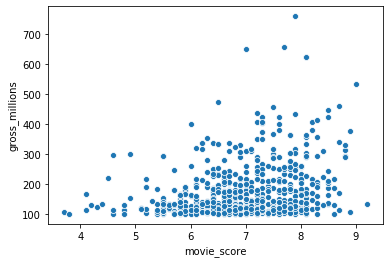

In [147]:
sns.scatterplot(data = movies_gross_filter,x ='movie_score',y='gross_millions')

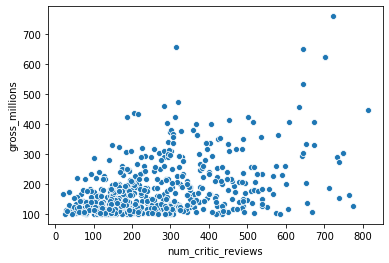

In [148]:
sns.scatterplot(data = movies_gross_filter,x ='num_critic_reviews',y='gross_millions')

## Analyze director success

Do certain director's tend to make more successful movies?

In [149]:
#group by director; average gross income
directors_gross = movies_f[['director_name','gross']].groupby(['director_name']).mean().sort_values(by='gross', ascending=False)
directors_gross['gross_millions'] = round(directors_gross['gross'] / 1000000, 2)

#directors_gross.head(10)

In [150]:
#group by director; count number of movies
directors_count = movies_f[['director_name','color']].groupby(['director_name']).count().sort_values(by='color',ascending = False)
directors_count = directors_count.rename(columns = {'color': 'num_movies'})

#directors_count

In [151]:
#group by director; average movie score
directors_score = movies_f[['director_name','movie_score']].groupby(['director_name']).mean().sort_values(by='movie_score', ascending = False)

#directors_score.head(10)

In [152]:
#group by director; average budget
directors_budget = movies_f[['director_name','budget']].groupby(['director_name']).mean().sort_values(by='budget', ascending = False)
directors_budget['budget_millions'] = round(directors_budget['budget'] / 1000000, 2)

#directors_score.head(10)

In [153]:
#group by director; average facebook likes
director_fblikes = movies_f[['director_name','director_facebook_likes']].groupby(['director_name']).mean().sort_values(by='director_facebook_likes', ascending = False)

#director_fblikes.head(10)

In [154]:
#group by director; average movie facebook likes
movie_fblikes = movies_f[['director_name','movie_facebook_likes']].groupby(['director_name']).mean().sort_values(by='movie_facebook_likes', ascending = False)

#movie_fblikes.head(10)

In [155]:
# merge director data into one df
directors_df_lst = [directors_gross, directors_budget, directors_count, directors_score, director_fblikes, movie_fblikes]
directors_df = reduce(lambda left,right: pd.merge(left,right,on='director_name'), directors_df_lst)
directors_df = directors_df.drop(columns=['gross', 'budget'])
directors_df = directors_df.rename(columns = {'gross_millions': 'avg_gross_millions',
                                             'budget_millions': 'avg_budget_million',
                                             'movie_score': 'avg_movie_score',
                                             'director_facebook_likes':'avg_director_fb_likes',
                                             'movie_facebook_likes':'avg_movie_fb_likes'})

directors_df['avg_movie_score'] = round(directors_df['avg_movie_score'],2)
directors_df['avg_movie_fb_likes'] = round(directors_df['avg_movie_fb_likes'],2)

# filter df to focus on most successful directors
directors_df_filter = directors_df[directors_df['avg_gross_millions']>=100]

In [156]:
# top grossing directors
directors_df_filter.head(10)

,avg_gross_millions,avg_budget_million,num_movies,avg_movie_score,avg_director_fb_likes,avg_movie_fb_likes
director_name,,,,,,
James Cameron,709.59,218.50,2,7.80,0.0,29500.00
Joss Whedon,432.72,182.50,4,7.92,0.0,94500.00
Lee Unkrich,414.98,200.00,1,8.30,125.0,30000.00
Chris Buck,400.74,150.00,1,7.60,69.0,58000.00
George Lucas,388.49,114.33,3,6.93,0.0,7666.67
Tim Miller,363.02,58.00,1,8.10,84.0,117000.00
Kyle Balda,336.03,74.00,1,6.40,22.0,70000.00
Colin Trevorrow,328.09,75.38,2,7.00,365.0,90500.00
Yarrow Cheney,323.51,75.00,1,6.80,11.0,36000.00


In [157]:
# directors with top average movie scores
directors_df_filter.sort_values(by = 'avg_movie_score', ascending = False).head(10)

,avg_gross_millions,avg_budget_million,num_movies,avg_movie_score,avg_director_fb_likes,avg_movie_fb_likes
director_name,,,,,,
Christopher Nolan,226.65,125.62,8,8.43,22000.0,103625.00
Lee Unkrich,414.98,200.00,1,8.30,125.0,30000.00
Pete Docter,313.11,155.00,3,8.23,0.0,48333.33
Tim Miller,363.02,58.00,1,8.10,84.0,117000.00
Joss Whedon,432.72,182.50,4,7.92,0.0,94500.00
Don Hall,222.49,165.00,1,7.90,38.0,41000.00
James Cameron,709.59,218.50,2,7.80,0.0,29500.00
Rich Moore,189.41,165.00,1,7.80,66.0,40000.00
Alfonso Cuarón,143.09,77.00,4,7.80,0.0,43750.00


In [158]:
# directors whose movies average the most facebook likes
directors_df_filter.sort_values(by = 'avg_movie_fb_likes', ascending = False).head(10)

,avg_gross_millions,avg_budget_million,num_movies,avg_movie_score,avg_director_fb_likes,avg_movie_fb_likes
director_name,,,,,,
Tim Miller,363.02,58.00,1,8.10,84.0,117000.0
Christopher Nolan,226.65,125.62,8,8.43,22000.0,103625.0
Joss Whedon,432.72,182.50,4,7.92,0.0,94500.0
Josh Boone,124.87,12.00,1,7.80,131.0,93000.0
Colin Trevorrow,328.09,75.38,2,7.00,365.0,90500.0
Robert Stromberg,241.41,180.00,1,7.00,171.0,89000.0
Alan Taylor,148.05,162.50,2,6.85,230.0,72500.0
Noam Murro,106.37,110.00,1,6.20,263.0,71000.0
Kyle Balda,336.03,74.00,1,6.40,22.0,70000.0


## Analzye Genre Success

In [166]:
print(range(len(movies['genres'])))

range(0, 5043)


In [167]:
genre_action = movies[movies['genres'].str.contains('Action')]
genre_adventure = movies[movies['genres'].str.contains('Adventure')]
genre_fantasy = movies[movies['genres'].str.contains('Fantasy')]
genre_thriller = movies[movies['genres'].str.contains('Thriller')]
genre_scifi = movies[movies['genres'].str.contains('Sci-Fi')]
genre_crime = movies[movies['genres'].str.contains('Crime')]
genre_comedy = movies[movies['genres'].str.contains('Comedy')]
genre_drama = movies[movies['genres'].str.contains('Drama')]
genre_doc = movies[movies['genres'].str.contains('Documentary')]
genre_romance = movies[movies['genres'].str.contains('Romance')]
genre_horror = movies[movies['genres'].str.contains('Horror')]

genre_lst = ['Action','Adventure','Fantasy','Thriller','Sci-Fi','Crime','Comedy','Drama','Documentary','Romance','Horror']

for x in genre_lst:
    movies['genre_' + x.lower()] = ""

In [168]:
for x in range(len(movies['genres'])):
    for y in genre_lst:
        if y in movies['genres'][x]:
            movies['genre_' + y.lower()][x] = y.lower()
        else:
            movies['genre_' + y.lower()][x] = 'not ' + y.lower()

/Users/kristinkent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kristinkent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Create df to analyzing average outcome by genre

In [174]:
genre_avg = pd.DataFrame()
for x in genre_lst:
    x = movies.groupby(['genre_' + x.lower()]).mean()
    x = x.rename_axis('genre', axis= 0)
    genre_avg = genre_avg.append(x)

genre_avg = genre_avg[genre_avg.index.str.contains("not")==False]

[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

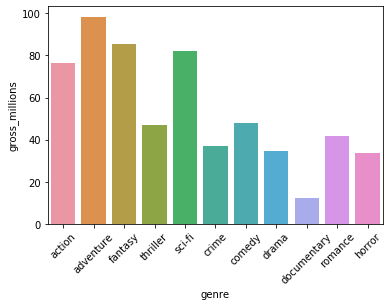

In [178]:
genre_avg_gross = sns.barplot(x= genre_avg.index, y="gross_millions", data=genre_avg)
genre_avg_gross.set_xticklabels(genre_avg_gross.get_xticklabels(),rotation=45)

# adventure, action, fantasy, and sci-fi have the highest average gross

[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

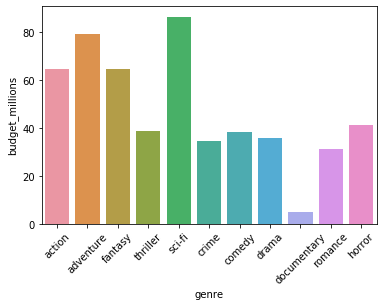

In [179]:
genre_avg_budget = sns.barplot(x= genre_avg.index, y="budget_millions", data=genre_avg)
genre_avg_budget.set_xticklabels(genre_avg_budget.get_xticklabels(),rotation=45)

# adventure, action, fantasy, and sci-fi have the highest average budget

[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

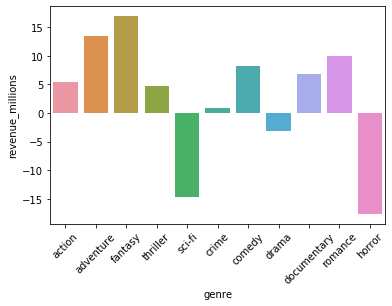

In [180]:
genre_avg_revenue = sns.barplot(x= genre_avg.index, y="revenue_millions", data=genre_avg)
genre_avg_revenue.set_xticklabels(genre_avg_revenue.get_xticklabels(),rotation=45)

# sci-fi and horror movies lose money, on average; fantasy and adventure movies have the highest avg revenue

### Create df to analyzing total outcome (sum) by genre

In [173]:
genre_sum = pd.DataFrame()
for x in genre_lst:
    x = movies.groupby(['genre_' + x.lower()]).sum()
    x = x.rename_axis('genre', axis= 0)
    genre_sum = genre_sum.append(x)

genre_sum = genre_sum[genre_sum.index.str.contains("not")==False]

,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,budget_millions,gross_millions,revenue_millions
genre,,,,,,,,,,,,,,,,,,
action,200489.0,127634.0,817217.0,934576.0,9558166.0,7.514554e+10,144076525,14222490,462294.0,7.098832e+10,2271580.0,2469812.0,7194.6,2521.71,12021768,70988.33,75145.60,5166.41
adventure,170053.0,103293.0,666312.0,971035.0,7236785.0,7.980661e+10,129228905,11530389,395486.0,7.005052e+10,1827739.0,2275537.0,5945.2,2001.88,12201535,70050.52,79806.64,10754.36
fantasy,103995.0,62825.0,346319.0,649863.0,4579688.0,4.511605e+10,72135058,7220257,224746.0,3.692954e+10,1191414.0,1313782.0,3847.3,1314.97,6866402,36929.55,45115.96,8739.04
thriller,230335.0,152188.0,1149592.0,894531.0,11026777.0,5.490886e+10,132890677,15660840,454286.0,5.052291e+10,2770866.0,2506779.0,8909.4,3173.63,11603562,50522.92,54908.96,5379.39
sci-fi,121679.0,65974.0,426119.0,509776.0,4151725.0,4.186225e+10,87457411,6548856,289524.0,4.969955e+10,1199338.0,1238950.0,3869.6,1370.50,9186872,49699.56,41862.19,-7382.42
crime,123211.0,96238.0,763948.0,501259.0,6842958.0,2.827454e+10,82189348,9765363,226610.0,2.805147e+10,1716058.0,1638040.0,5836.1,2031.64,6011560,28051.47,28274.60,636.70
comedy,217038.0,185033.0,811064.0,1167874.0,11142803.0,7.743797e+10,119296764,16779205,346038.0,6.460528e+10,3675682.0,2722588.0,11597.5,3705.05,9175000,64605.25,77437.99,12401.97
drama,347842.0,292129.0,1957846.0,1524084.0,17191700.0,7.391330e+10,200799112,24965027,661814.0,8.126160e+10,5041383.0,4305710.0,17545.2,5581.29,19963537,81261.57,73913.31,-6209.27
documentary,7870.0,11245.0,45749.0,10630.0,136014.0,1.103052e+09,1519151,197367,10283.0,4.555545e+08,238885.0,31328.0,868.8,196.64,296902,455.54,1103.01,458.17


[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

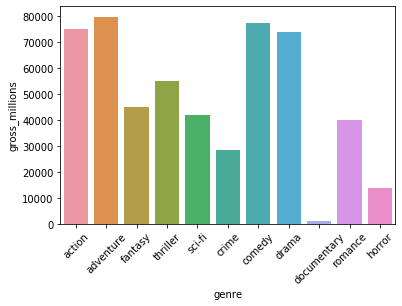

In [181]:
genre_sum_gross = sns.barplot(x= genre_sum.index, y="gross_millions", data=genre_sum)
genre_sum_gross.set_xticklabels(genre_sum_gross.get_xticklabels(),rotation=45)

# comedy and drama have high total gross earnings, despite moderate avg. gross earnings

[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

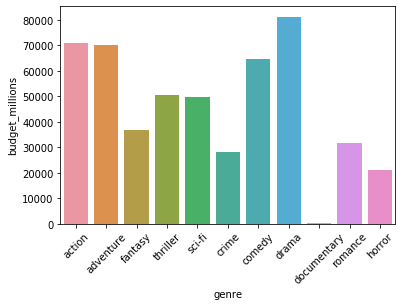

In [182]:
genre_sum_budget = sns.barplot(x= genre_sum.index, y="budget_millions", data=genre_sum)
genre_sum_budget.set_xticklabels(genre_sum_budget.get_xticklabels(),rotation=45)

[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

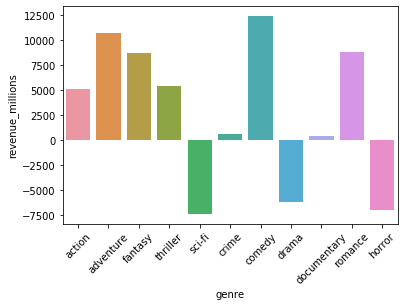

In [183]:
genre_sum_revenue = sns.barplot(x= genre_sum.index, y="revenue_millions", data=genre_sum)
genre_sum_revenue.set_xticklabels(genre_sum_revenue.get_xticklabels(),rotation=45)

# sci-fi, drama, and horror movies lose money overall
# comedy and romance have high total revenue, despite low avg. revenue